In [22]:
# Student Name: DJEBBAR Naouel
# ========================================================

import pandas as pd
import io

# Data for homework.csv, derived from kernel variables
csv_data = 'price,lotsize,bedrooms,bathrms,stories,garagepl\n42000,5850,3,1,2,1\n38500,4000,2,1,1,0\n49500,3060,3,1,1,0\n60500,6650,3,1,2,0\n61000,6360,2,1,1,0\n66000,4160,3,1,1,0\n66000,3880,3,2,2,2\n69000,4160,3,1,3,0\n83800,4800,3,1,1,1\n88500,5500,3,2,4,1\n90000,7200,3,2,1,3\n30500,3500,2,1,1,0\n31000,3500,3,1,2,0\n82000,7800,4,2,2,2\n110000,9000,4,3,3,3\n'

# Write the string data to a file named 'homework.csv'
with open('homework.csv', 'w') as f:
    f.write(csv_data)

# Now, read the CSV file
df = pd.read_csv("homework.csv")
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   price     15 non-null     int64
 1   lotsize   15 non-null     int64
 2   bedrooms  15 non-null     int64
 3   bathrms   15 non-null     int64
 4   stories   15 non-null     int64
 5   garagepl  15 non-null     int64
dtypes: int64(6)
memory usage: 852.0 bytes


Simple Linear Regression:
Slope: 8.678644471065084
Intercept: 20576.660541943966
R²: 0.10549809531781729
MSE: 562393225.2937922


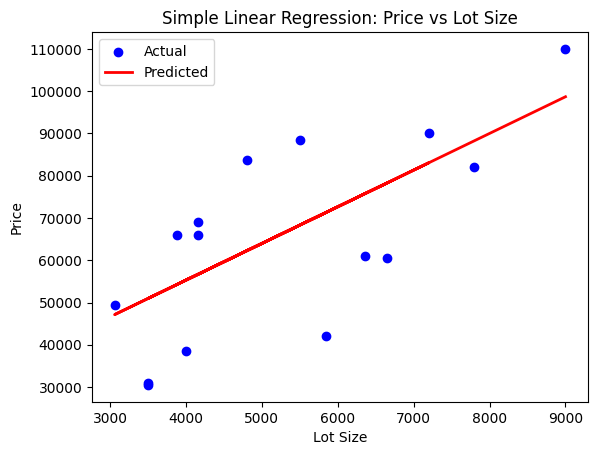

In [23]:
# Simple Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

X = df[['lotsize']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

slr = LinearRegression()
slr.fit(X_train, y_train)

y_pred = slr.predict(X_test)

print("Simple Linear Regression:")
print("Slope:", slr.coef_[0])
print("Intercept:", slr.intercept_)
print("R²:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, slr.predict(X), color='red', linewidth=2, label='Predicted')
plt.xlabel('Lot Size')
plt.ylabel('Price')
plt.title('Simple Linear Regression: Price vs Lot Size')
plt.legend()
plt.show()





Multiple Linear Regression:
Intercept: 23278.519471512613
lotsize: 4.8809722566564275
bedrooms: 7182.746249194928
bathrms: -13890.935053122877
stories: 2055.375316135947
garagepl: 13568.446576263252
R²: -0.013240328302777993
MSE: 637046710.8556966


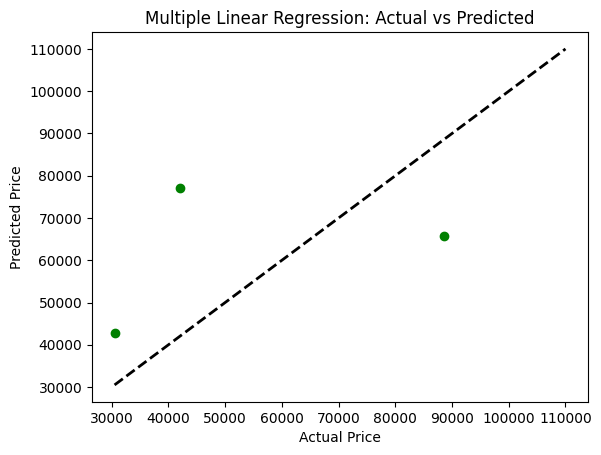

In [24]:
# Multiple Linear Regression
features = ['lotsize', 'bedrooms', 'bathrms', 'stories', 'garagepl']
X_multi = df[features]
y = df['price']

X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_multi, y, test_size=0.2, random_state=42)

mlr = LinearRegression()
mlr.fit(X_train_m, y_train_m)

y_pred_m = mlr.predict(X_test_m)

print("\nMultiple Linear Regression:")
print("Intercept:", mlr.intercept_)
for f, coef in zip(features, mlr.coef_):
    print(f"{f}: {coef}")

print("R²:", r2_score(y_test_m, y_pred_m))
print("MSE:", mean_squared_error(y_test_m, y_pred_m))

plt.scatter(y_test_m, y_pred_m, color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Multiple Linear Regression: Actual vs Predicted')
plt.show()
